In [8]:
import pandas as pd

C:\Users\91798\AppData\Local\Temp\ipykernel_23764\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [9]:
df=pd.read_csv('train.csv')

In [10]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
X=df.drop('label',axis=1)

In [12]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [13]:
y=df['label']

In [14]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [15]:
df.shape

(20800, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [17]:
df=df.dropna()

In [18]:
df.shape

(18285, 5)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [20]:
messages=df.copy()

In [21]:
messages.reset_index(inplace=True)

In [22]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review= [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)


In [23]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [24]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [25]:
X.shape

(18285, 5000)

In [26]:
y=messages['label']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [28]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [29]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [30]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [31]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [35]:
import numpy as np
from sklearn import metrics
import itertools 

accuracy: 0.902
Confusion matrix, without normalization


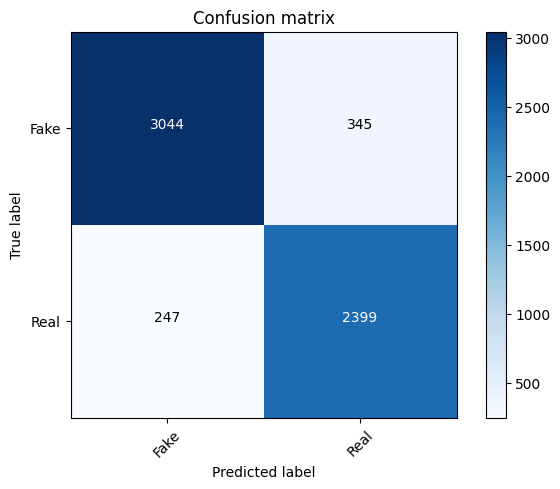

In [36]:
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f"%score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])


In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier(n_iter_no_change=50)

In [38]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)

accuracy: 0.920
Confusion matrix, without normalization


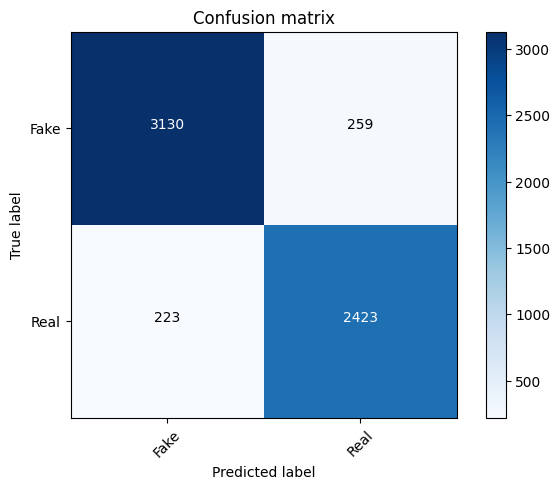

In [39]:
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f"%score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])


In [42]:
classifier=MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))


c:\Users\91798\Documents\Full Stack Machine Learning\fullstack\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
c:\Users\91798\Documents\Full Stack Machine Learning\fullstack\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.5615575807787904
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9025683512841757
Alpha: 0.30000000000000004, Score : 0.9024026512013256
Alpha: 0.4, Score : 0.9017398508699255
Alpha: 0.5, Score : 0.9015741507870754
Alpha: 0.6000000000000001, Score : 0.9022369511184756
Alpha: 0.7000000000000001, Score : 0.9025683512841757
Alpha: 0.8, Score : 0.9015741507870754
Alpha: 0.9, Score : 0.9017398508699255


In [43]:
classifier

MultinomialNB(alpha=0.9)

In [46]:
feature_names=cv.get_feature_names_out()

In [48]:
classifier.feature_log_prob_[0]

array([ -9.06056227,  -9.06056227, -10.28838629, ...,  -9.99212048,
       -11.45845755,  -9.42157562])

In [51]:
sorted(zip(classifier.feature_log_prob_[0],feature_names),reverse=True)[:20]

[(-2.9468577463990755, 'new'),
 (-2.994219848520549, 'time'),
 (-3.000566240637532, 'york'),
 (-3.0008020674474167, 'new york'),
 (-3.014815217142134, 'york time'),
 (-3.014815217142134, 'new york time'),
 (-3.9648310157438633, 'breitbart'),
 (-4.004573851696944, 'trump'),
 (-5.2756841712452855, 'donald'),
 (-5.282590276041697, 'donald trump'),
 (-5.755045510465673, 'say'),
 (-5.992274458590198, 'obama'),
 (-6.016039835625665, 'clinton'),
 (-6.106599412671392, 'presid'),
 (-6.122523316028115, 'state'),
 (-6.177512429323892, 'report'),
 (-6.188882648465076, 'attack'),
 (-6.253840544739848, 'hous'),
 (-6.259960514881633, 'brief'),
 (-6.316793989644799, 'hillari')]